In [1]:
from config import connection as conn
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
connection_details = conn.connection
hostname = connection_details["hostname"]
port=connection_details["portnumber"]
db_name = connection_details["database_name"]
username = connection_details["username"]
password = connection_details["password"]
engine = create_engine(f'postgresql://{username}:{password}@{hostname}:{port}/{db_name}')

In [3]:
sql_statement = """
WITH EMP_LATEST_TITLE_WITH
AS
    (
        SELECT EMP_TITLE.EMP_NO, TITLE
        FROM T_EMP_TITLE EMP_TITLE
            JOIN (
                    SELECT EMP_NO, MAX(TO_DATE) AS LATEST_TO_DATE
                    FROM T_EMP_TITLE TITLE
                    GROUP BY EMP_NO
                 ) EMP_LATEST_TITLE ON (EMP_LATEST_TITLE.EMP_NO = EMP_TITLE.EMP_NO AND EMP_LATEST_TITLE.LATEST_TO_DATE = EMP_TITLE.TO_DATE)
    ),
EMP_LATEST_SALARY_WITH
AS
    (
        SELECT SAL.EMP_NO, SAL.SALARY
        FROM T_EMP_SALARY SAL
            JOIN (
                    SELECT EMP_NO, MAX(TO_DATE) AS LATEST_TO_DATE
                    FROM T_EMP_SALARY
                    GROUP BY EMP_NO
                 ) EMP_LATEST_SAL ON (EMP_LATEST_SAL.EMP_NO = SAL.EMP_NO AND EMP_LATEST_SAL.LATEST_TO_DATE = SAL.TO_DATE)
    )    
SELECT TITLE, ROUND(CAST(AVG(SALARY) AS NUMERIC), 2) AS AVG_SALARY
FROM EMP_LATEST_TITLE_WITH TITLE
    JOIN EMP_LATEST_SALARY_WITH SAL ON (SAL.EMP_NO = TITLE.EMP_NO)
GROUP BY TITLE
ORDER BY TITLE
"""

In [4]:
resultset = pd.read_sql(sql_statement, engine)

In [5]:
resultset.head(10)

,title,avg_salary
0,Assistant Engineer,48564.43
1,Engineer,48535.14
2,Manager,49600.56
3,Senior Engineer,48506.80
4,Senior Staff,58503.99
5,Staff,58432.87
6,Technique Leader,48582.43


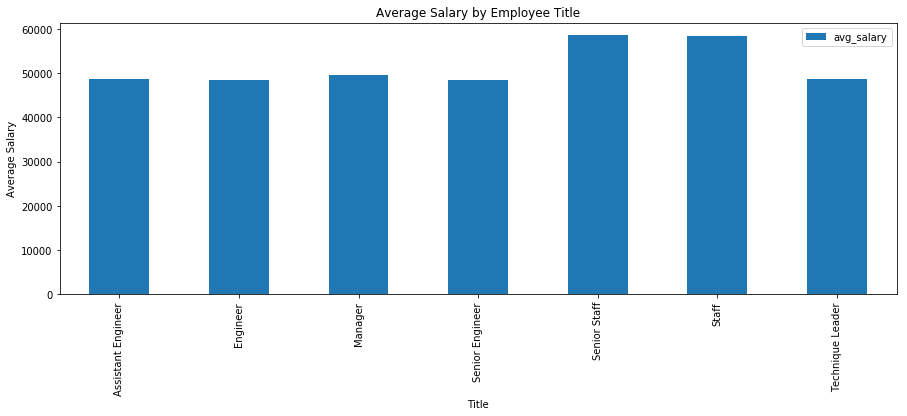

In [6]:
resultset.plot(kind = "bar", x="title", y="avg_salary", title ="Average Salary by Employee Title", figsize = [15,5])
plt.xlabel("Title")
plt.ylabel("Average Salary")
plt.show()

In [7]:
plt.savefig("Average_Salary_By_Title_Analysis.png")

<Figure size 432x288 with 0 Axes>